In [1]:
pip install pmdarima

     |████████████████████████████████| 1.5MB 5.6MB/s 
     |████████████████████████████████| 2.1MB 41.9MB/s 
     |████████████████████████████████| 9.5MB 17.0MB/s 
  Found existing installation: Cython 0.29.22
    Uninstalling Cython-0.29.22:
      Successfully uninstalled Cython-0.29.22
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [2]:
import math
import io

In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [4]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as pp
import seaborn as sns

%matplotlib inline

In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

In [7]:
train = pd.read_csv('train.csv', parse_dates=['date'])
test = pd.read_csv('test.csv')
stores = pd.read_csv('stores.csv')

In [8]:
train.groupby("store_nbr").unit_sales.sum()

store_nbr
1     136374.416
2     195168.866
3     445768.398
4     188534.070
5     183800.027
6     249469.802
7     211020.624
8     281577.184
9     246860.512
10    101939.659
11    279903.316
12    112791.357
13    103567.439
14    139002.776
15    114588.280
16    123761.887
17    151255.838
18    127798.417
19    107649.334
23    135364.981
24    255611.213
25    114804.369
26    100958.202
27    145029.128
28    110819.512
30     62324.039
31    143143.910
32     59732.854
33    127079.340
34    161268.060
35     62160.717
37    201669.350
38    184934.379
39    168890.714
40    110787.775
41    102707.301
43    107103.509
44    615660.239
45    487900.733
46    440871.510
47    482367.503
48    354525.420
49    251818.884
50    292257.710
51    303654.532
54     91602.032
Name: unit_sales, dtype: float64

In [9]:
store_47 = train.query('store_nbr == "47"')

In [10]:
train.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion
0,0,2013-01-01,25,103665,7.0,NaN
1,1,2013-01-01,25,105574,1.0,NaN
2,2,2013-01-01,25,105575,2.0,NaN
3,3,2013-01-01,25,108079,1.0,NaN
4,4,2013-01-01,25,108701,1.0,NaN


In [11]:
store_47 = store_47.groupby('date').unit_sales.sum().reset_index()

In [12]:
store_47

,date,unit_sales
0,2013-01-02,27263.111
1,2013-01-03,18340.205
2,2013-01-04,18982.009
3,2013-01-05,26996.264
4,2013-01-06,31646.357
5,2013-01-07,15882.998
6,2013-01-08,13098.628
7,2013-01-09,14781.954
8,2013-01-10,12557.096
9,2013-01-11,15506.021


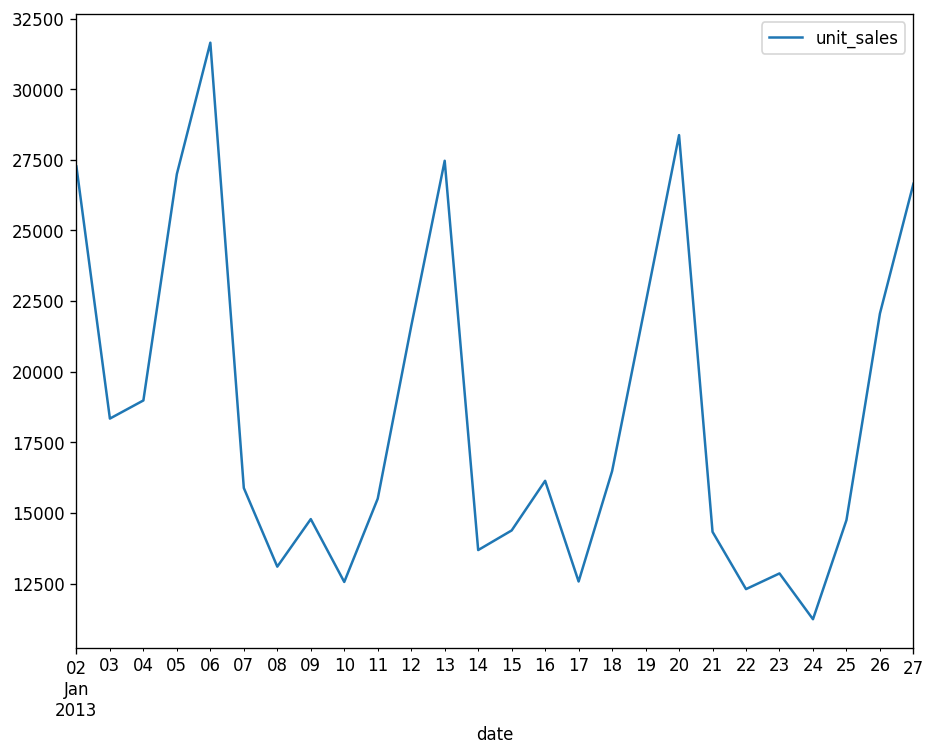

In [13]:
store_47.plot(x='date',y='unit_sales')

In [14]:
store_47.min()

date          2013-01-02 00:00:00
unit_sales                11237.1
dtype: object

In [15]:
store_47.max()

date          2013-01-27 00:00:00
unit_sales                31646.4
dtype: object

In [16]:
store_47.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.


unit_sales    18552.596269
dtype: float64

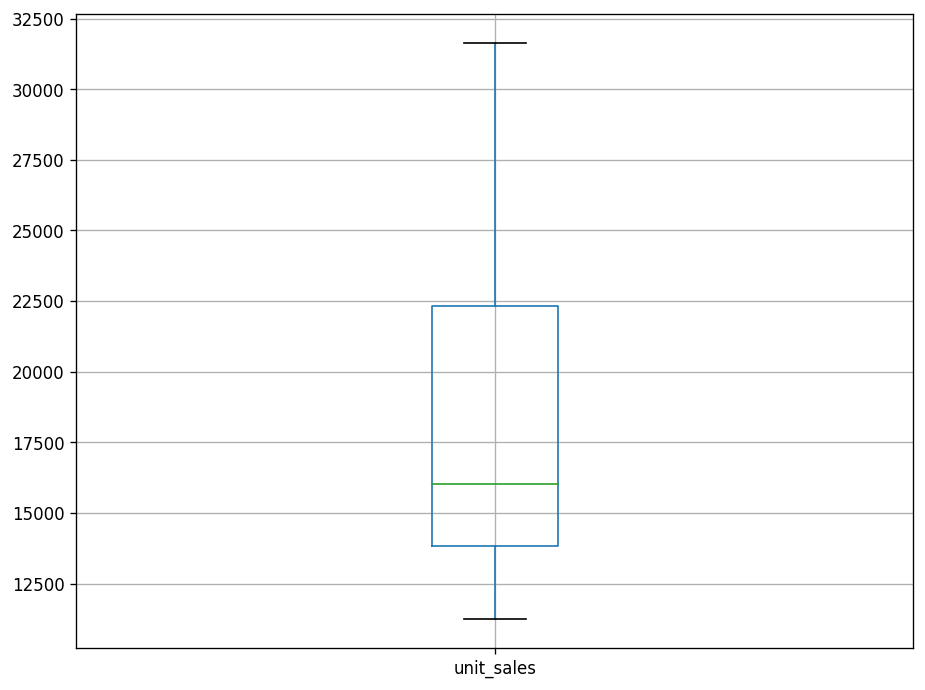

In [17]:
store_47.boxplot()

In [18]:
store_47 =store_47[['date', 'unit_sales']]
store_47= store_47.set_index('date')
store_47

,unit_sales
date,
2013-01-02,27263.111
2013-01-03,18340.205
2013-01-04,18982.009
2013-01-05,26996.264
2013-01-06,31646.357
2013-01-07,15882.998
2013-01-08,13098.628
2013-01-09,14781.954
2013-01-10,12557.096


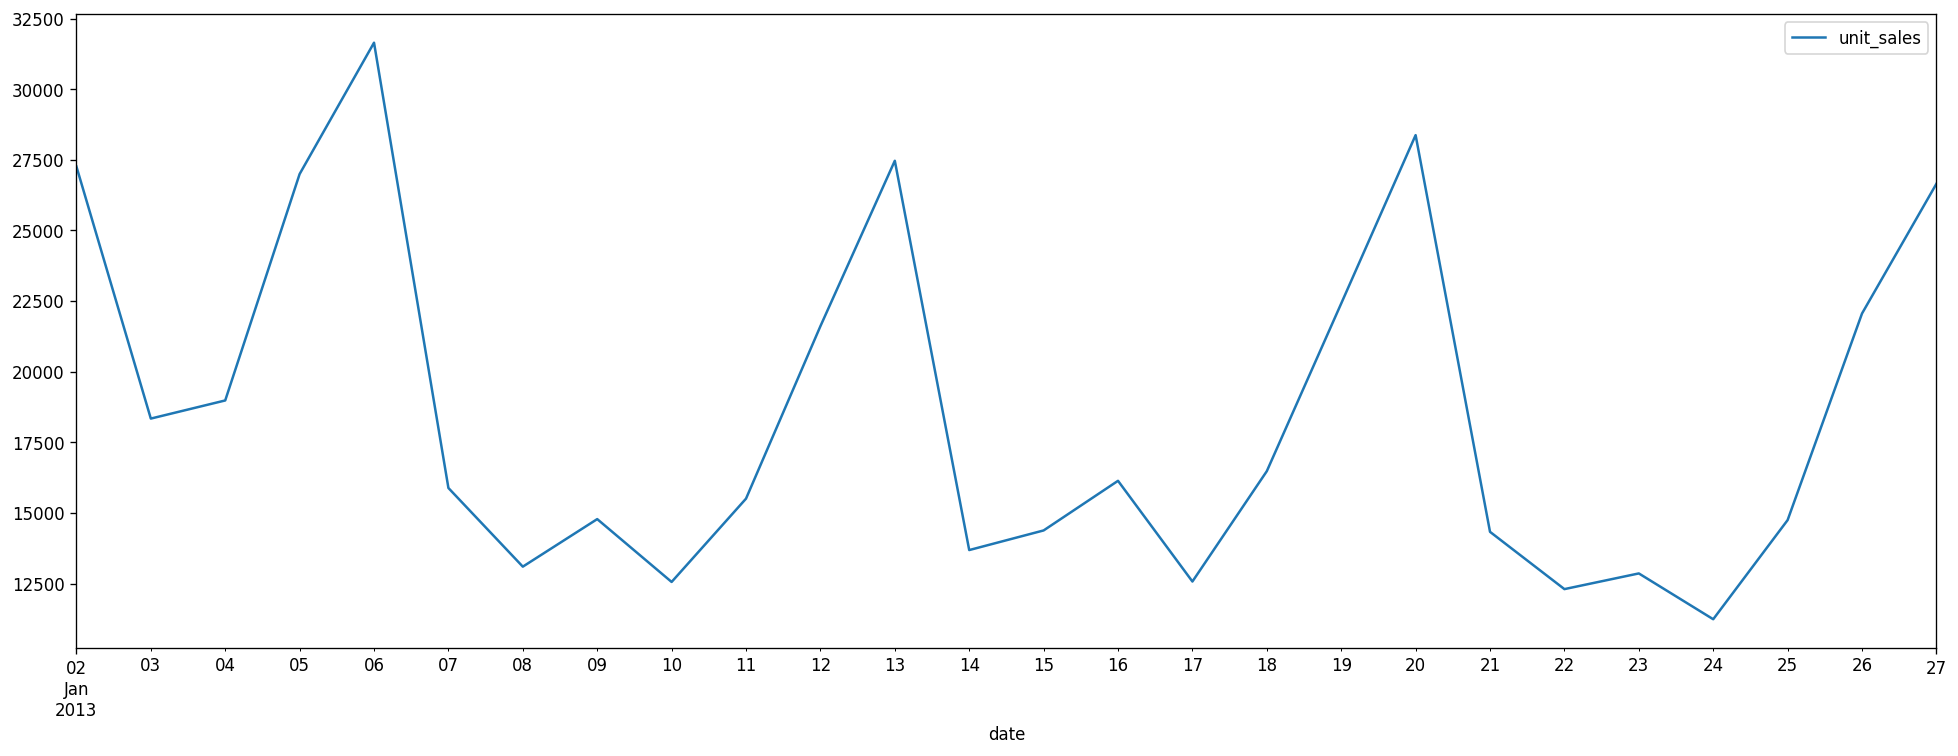

In [19]:
store_47.plot(figsize= (20,7))
plt.show()

In [20]:
#Chia du lieu
train= store_47[:20]
test= store_47[-6:]

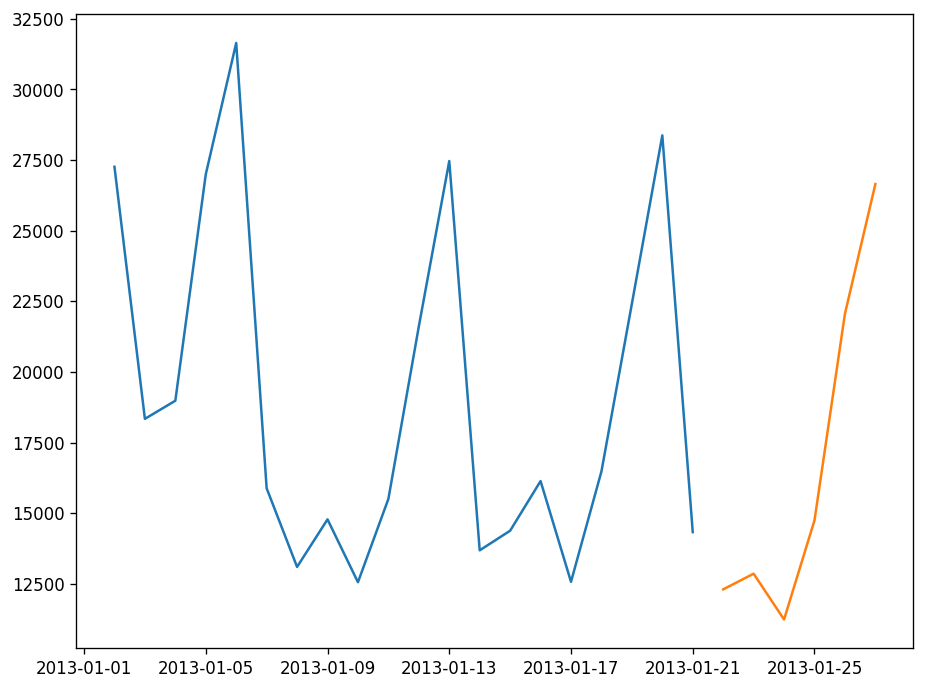

In [21]:
plt.plot(train)
plt.plot(test)

In [22]:
series=train['unit_sales']

In [23]:
from statsmodels.tsa.stattools import kpss
def kpss_test(series, **kw):    
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    # Format Output
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')

kpss_test(series)

KPSS Statistic: 0.25349758751032286
p-value: 0.1
num lags: 9
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1911: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warn_msg.format(direction="greater"), InterpolationWarning


In [24]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

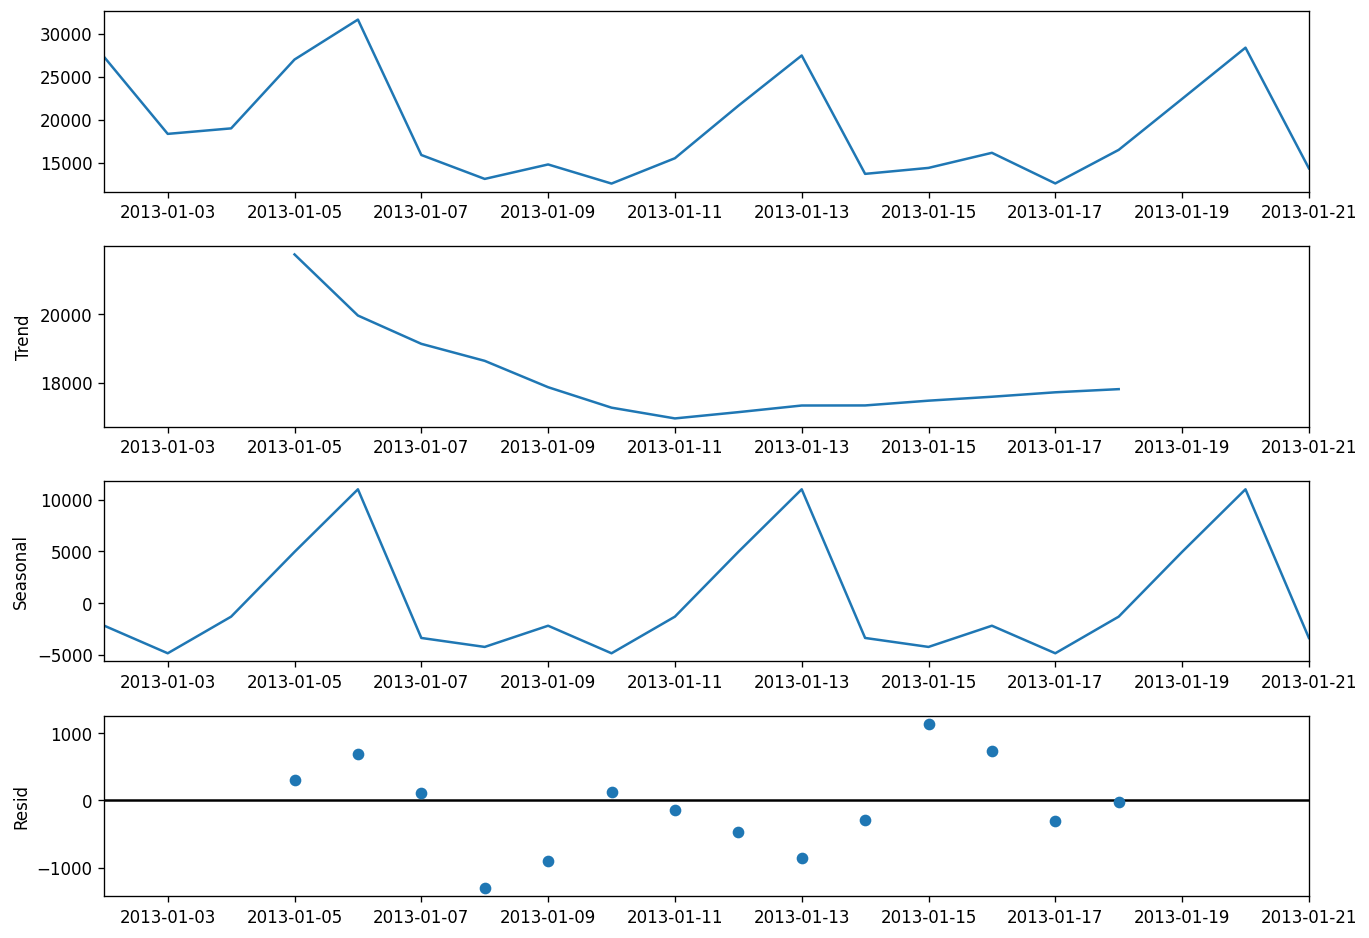

In [25]:
result = seasonal_decompose(train, model='additive')
fig = result.plot()
fig.set_size_inches(12,8)
x=result.observed

<Figure size 1440x720 with 0 Axes>

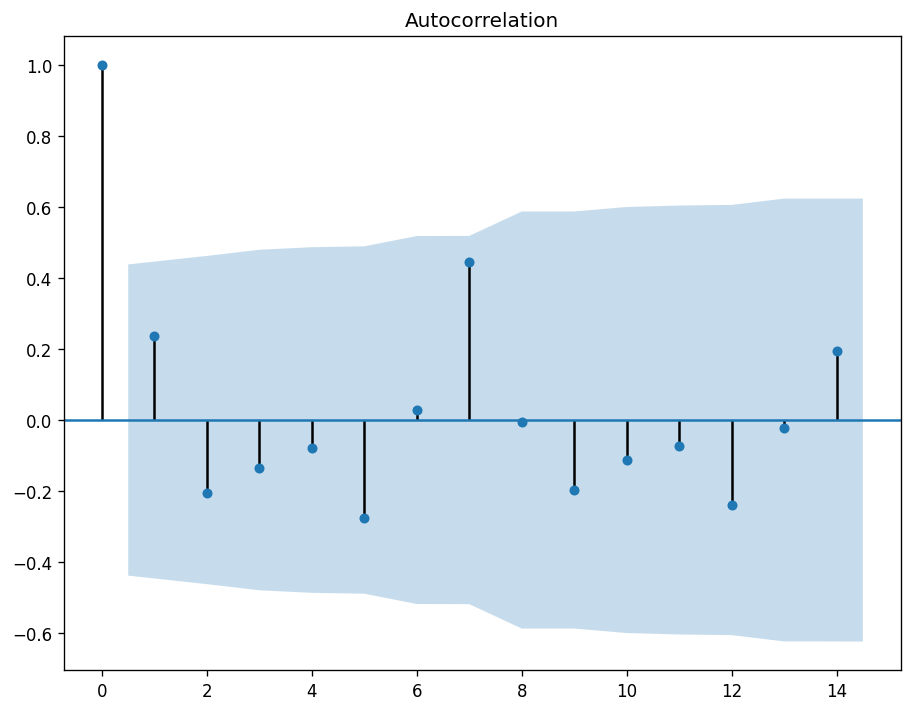

In [26]:
#ACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.figure(figsize=(12, 6))
ax1 = plot_acf(x)

In [30]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

In [34]:
from pmdarima.arima import auto_arima
model = auto_arima(train, start_p=0, start_q=0,
                           max_p=7, max_q=0, m=0,
                           start_P=0, seasonal=False,
                           d=0, D=0, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=False)

 ARIMA(0,0,0)(0,0,0)[0]             : AIC=454.970, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=417.919, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=419.828, Time=0.02 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=417.666, Time=0.04 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=418.980, Time=0.04 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=inf, Time=0.06 sec

Best model:  ARIMA(3,0,0)(0,0,0)[0]          
Total fit time: 0.189 seconds


In [36]:
model_fit = model.fit(y=train, disp=0)
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   20
Model:               SARIMAX(3, 0, 0)   Log Likelihood                -204.833
Date:                Sun, 04 Apr 2021   AIC                            417.666
Time:                        09:22:33   BIC                            421.649
Sample:                             0   HQIC                           418.443
                                 - 20                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8716      0.376      2.319      0.020       0.135       1.608
ar.L2         -0.3908      0.568     -0.689      0.491      -1.503       0.722
ar.L3          0.4900      0.269      1.819      0.0

<Figure size 1440x720 with 0 Axes>

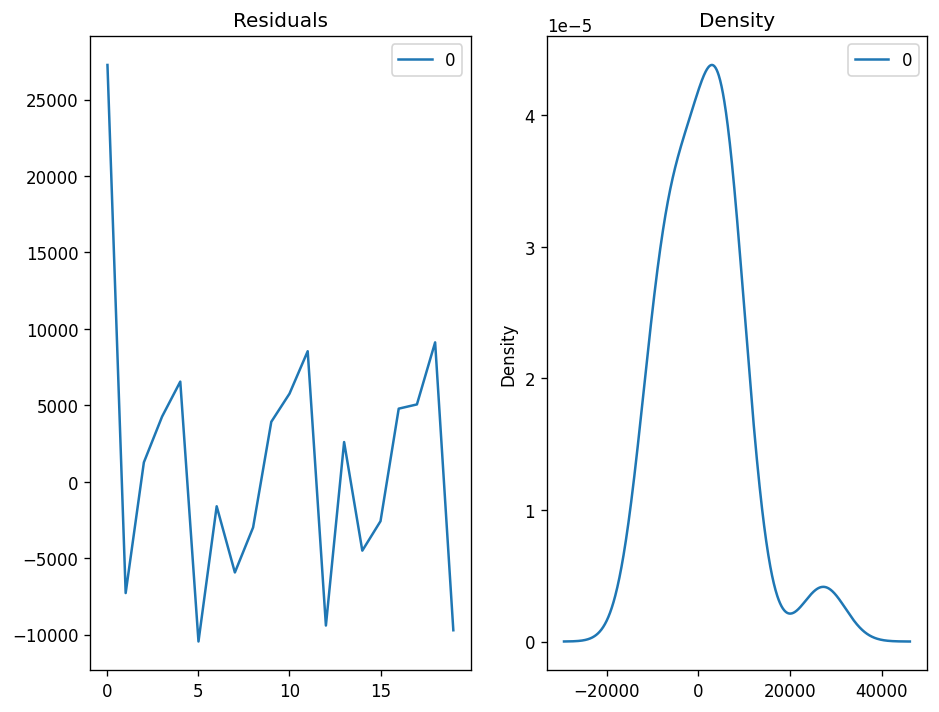

In [37]:
# Kiem tra phuong sai
residuals = pd.DataFrame(model_fit.resid())
plt.figure(figsize=(12, 6))
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [46]:
start = len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels')
print(pred)


[12384.35773832 19096.23270884 18826.20240437 15013.61849511
 15084.8699056  16504.76422106 15846.36246375 14752.46257668
 14752.08405772 14856.68080944]


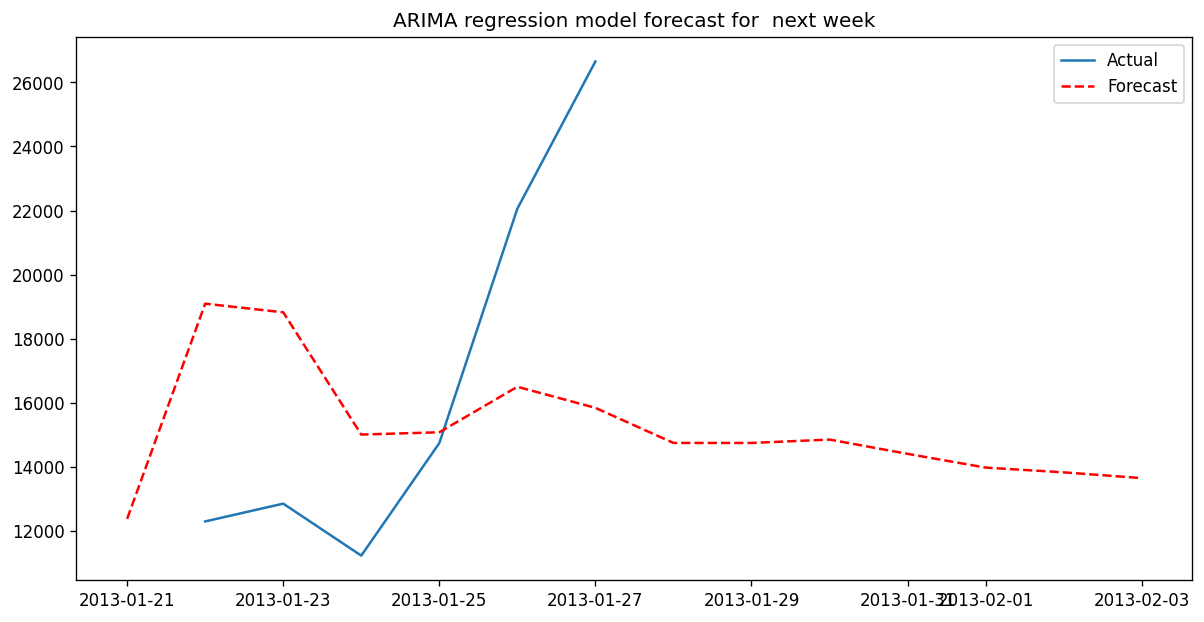

In [55]:
n_pred_perious = 14
fitted, confint = model_fit.predict(n_periods=n_pred_perious, return_conf_int=True)
date = pd.date_range(train.index[-1], periods=n_pred_perious, freq='D')

fitted_seri = pd.Series(fitted, index=date)
lower = confint[:, 0]
upper = confint[:, 1]

plt.figure(figsize=(12, 6))
plt.plot(test, label='Actual')
plt.plot(fitted_seri, color='red', linestyle='--', label = 'Forecast')
plt.legend()
plt.title('ARIMA regression model forecast for  next week')
plt.show()

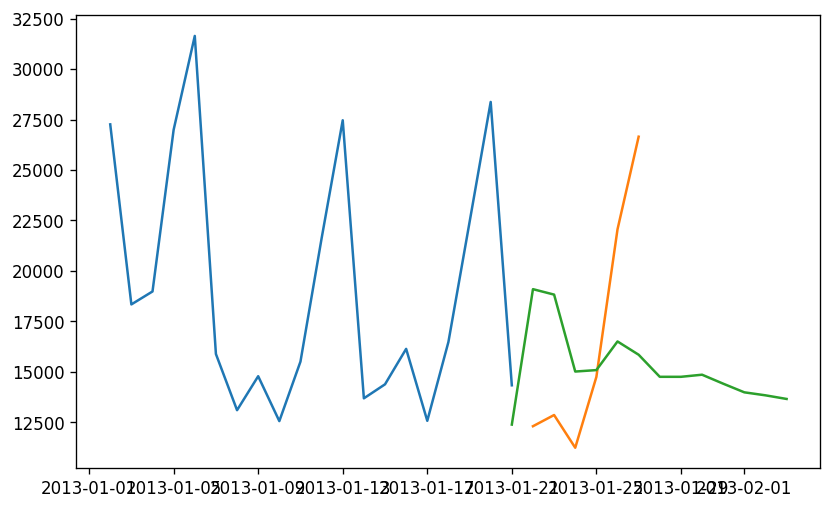

In [56]:
plt.figure(figsize = (8,5))
plt.plot(train, label = "Training")
plt.plot(test,label = "Testing")
plt.plot(fitted_seri,label = "Prediction")
plt.show()